In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly as py
% autosave 30

Autosaving every 30 seconds


In [3]:
pokemon = pd.read_csv('Pokemon.csv')

In [4]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
print(pokemon.shape)
print(pokemon.Generation.unique())

(800, 13)
[1 2 3 4 5 6]


In [7]:
#sns.countplot(pokemon.Generation)
#plt.show()

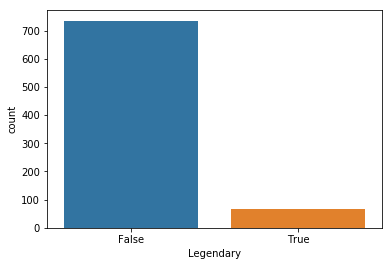

In [6]:
sns.countplot(pokemon.Legendary)
plt.show()

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.pipeline import make_pipeline

In [9]:
df1 = pokemon.iloc[:,4:]
df1.Legendary = df1.Legendary.astype(int)
print(df1.info())
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null int64
dtypes: int64(9)
memory usage: 56.3 KB
None


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,318,45,49,49,65,65,45,1,0
1,405,60,62,63,80,80,60,1,0
2,525,80,82,83,100,100,80,1,0
3,625,80,100,123,122,120,80,1,0
4,309,39,52,43,60,50,65,1,0


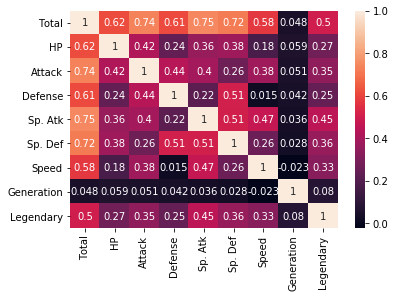

In [10]:
#print(df1.corr())
sns.heatmap(df1.corr(), annot = True)
plt.show()

In [25]:
# Drop variable Generation as it is not much correlative with Legendary
X = df1.drop(['Legendary','Generation'], axis=1).values
#X = df1.drop('Legendary', axis=1).values
y = df1['Legendary'].values

In [10]:
#scaler = StandardScaler()
#knn = KNeighborsClassifier()
#pipeline = make_pipeline(scaler, knn)
#from sklearn.preprocessing import scale
#print("Mean of Unscaled Features: {}".format(np.mean(X))) 
#print("Standard Deviation of Unscaled Features: {}".format(np.std(X)))
#print("Mean of Scaled Features: {}".format(np.mean(X_scaled))) 
#print("Standard Deviation of Scaled Features: {}".format(np.std(X_scaled)))

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 131, stratify = y)

In [27]:
#scale x
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

/Users/liangshiting/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



## Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

In [14]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logr = logreg.predict(X_test)
print(logreg.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred_logr))
print(classification_report(y_test, y_pred_logr))

0.9375
[[147   0]
 [ 10   3]]
             precision    recall  f1-score   support

          0       0.94      1.00      0.97       147
          1       1.00      0.23      0.38        13

avg / total       0.94      0.94      0.92       160



In [16]:
logreg.fit(X_train_scaled, y_train)
y_pred_logr_s = logreg.predict(X_test_scaled)
print(logreg.score(X_test_scaled, y_test))
print(confusion_matrix(y_test, y_pred_logr_s))
print(classification_report(y_test, y_pred_logr_s))

0.9625
[[146   1]
 [  5   8]]
             precision    recall  f1-score   support

          0       0.97      0.99      0.98       147
          1       0.89      0.62      0.73        13

avg / total       0.96      0.96      0.96       160



scaled X results in a better performance

In [17]:
cvscores_3 = cross_val_score(logreg, X, y, cv = 3)
print(np.mean(cvscores_3))
cvscores_10 = cross_val_score(logreg, X, y, cv = 10)
print(np.mean(cvscores_10))

0.927496644232
0.931286138459


## KNN

In [29]:
neighbors = np.arange(1,10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [47]:
for i,k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    test_accuracy[i]= np.mean(cross_val_score(knn, X,y, cv = 10))

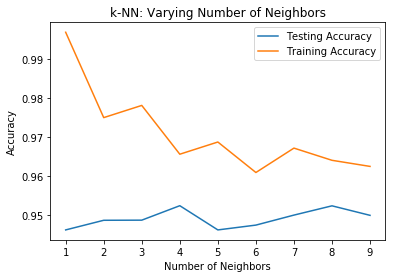

In [48]:
# optimizing the n_neighbors
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [49]:
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.96875

In [50]:
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[146   1]
 [  4   9]]
             precision    recall  f1-score   support

          0       0.97      0.99      0.98       147
          1       0.90      0.69      0.78        13

avg / total       0.97      0.97      0.97       160



In [51]:
#using scaled data
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)
y_pred = knn.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[143   4]
 [ 13   0]]
             precision    recall  f1-score   support

          0       0.92      0.97      0.94       147
          1       0.00      0.00      0.00        13

avg / total       0.84      0.89      0.87       160



In [52]:
cvscores_3 = cross_val_score(knn, X, y, cv = 3)
print(np.mean(cvscores_3))
cvscores_10 = cross_val_score(knn, X, y, cv = 10)
print(np.mean(cvscores_10))

0.940009199028
0.948726363494


## Random Forests

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rf = RandomForestClassifier(n_jobs=2, random_state=131, n_estimators=100)  
rf.fit(X_train, y_train)  
y_pred_rf = rf.predict(X_test) 
print(rf.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

0.975
[[146   1]
 [  3  10]]
             precision    recall  f1-score   support

          0       0.98      0.99      0.99       147
          1       0.91      0.77      0.83        13

avg / total       0.97      0.97      0.97       160



In [25]:
rf = RandomForestClassifier(n_jobs=2, random_state=131)  
rf.fit(X_train_scaled, y_train)  
y_pred_rf_s = rf.predict(X_test_scaled) 
print(rf.score(X_test_scaled, y_test))
print(confusion_matrix(y_test, y_pred_rf_s))
print(classification_report(y_test, y_pred_rf_s))

0.95
[[146   1]
 [  7   6]]
             precision    recall  f1-score   support

          0       0.95      0.99      0.97       147
          1       0.86      0.46      0.60        13

avg / total       0.95      0.95      0.94       160



In [26]:
cvscores_3 = cross_val_score(rf, X, y, cv = 3)
print(np.mean(cvscores_3))
cvscores_10 = cross_val_score(rf, X, y, cv = 10)
print(np.mean(cvscores_10))

0.929998216515
0.946163463041


## XGBoost

In [27]:
import xgboost as xgb

In [28]:
xg = xgb.XGBClassifier()
xg.fit(X_train, y_train)
y_pred_xg = xg.predict(X_test)
print(xg.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred_xg))
print(classification_report(y_test, y_pred_xg))

0.96875
[[145   2]
 [  3  10]]
             precision    recall  f1-score   support

          0       0.98      0.99      0.98       147
          1       0.83      0.77      0.80        13

avg / total       0.97      0.97      0.97       160



In [29]:
xg.fit(X_train_scaled, y_train)  
y_pred_xg_s = rf.predict(X_test_scaled) 
print(xg.score(X_test_scaled, y_test))
print(confusion_matrix(y_test, y_pred_xg_s))
print(classification_report(y_test, y_pred_xg_s))

0.95625
[[146   1]
 [  7   6]]
             precision    recall  f1-score   support

          0       0.95      0.99      0.97       147
          1       0.86      0.46      0.60        13

avg / total       0.95      0.95      0.94       160



In [30]:
cvscores_3 = cross_val_score(xg, X, y, cv = 3)
print(np.mean(cvscores_3))
cvscores_10 = cross_val_score(xg, X, y, cv = 10)
print(np.mean(cvscores_10))

0.943749823998
0.947429285826
